<a href="https://colab.research.google.com/github/Aishwaryaa128/aish_portfolio.github.io/blob/main/Stock_Market_Analysis_Using_Moving_Averages_and_Daily_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')


In [42]:
# Fetch Data from Yahoo Finance
ticker = 'AAPL'  # You can replace this with any stock ticker you want
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

data = yf.download(ticker, start,end)

# Display the first few rows of the data
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-27,196.020004,197.199997,192.550003,193.220001,192.199280,47460200
2023-07-28,194.669998,196.630005,194.139999,195.830002,194.795502,48291400
2023-07-31,196.059998,196.490005,195.259995,196.449997,195.412201,38824100
2023-08-01,196.240005,196.729996,195.279999,195.610001,194.576660,35175100
2023-08-02,195.039993,195.179993,191.850006,192.580002,191.562668,50389300


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-07-27 to 2024-07-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [45]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,186.646389,188.266310,185.063492,186.686984,186.286542,6.048666e+07
std,15.432174,15.592360,15.073186,15.347032,15.473722,2.461968e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.801846,4.742450e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502815,5.397365e+07
75%,192.592503,194.017498,191.494999,192.542500,192.211960,6.604168e+07
max,236.479996,237.229996,233.089996,234.820007,234.820007,2.464214e+08


In [47]:
data.shape

(252, 6)

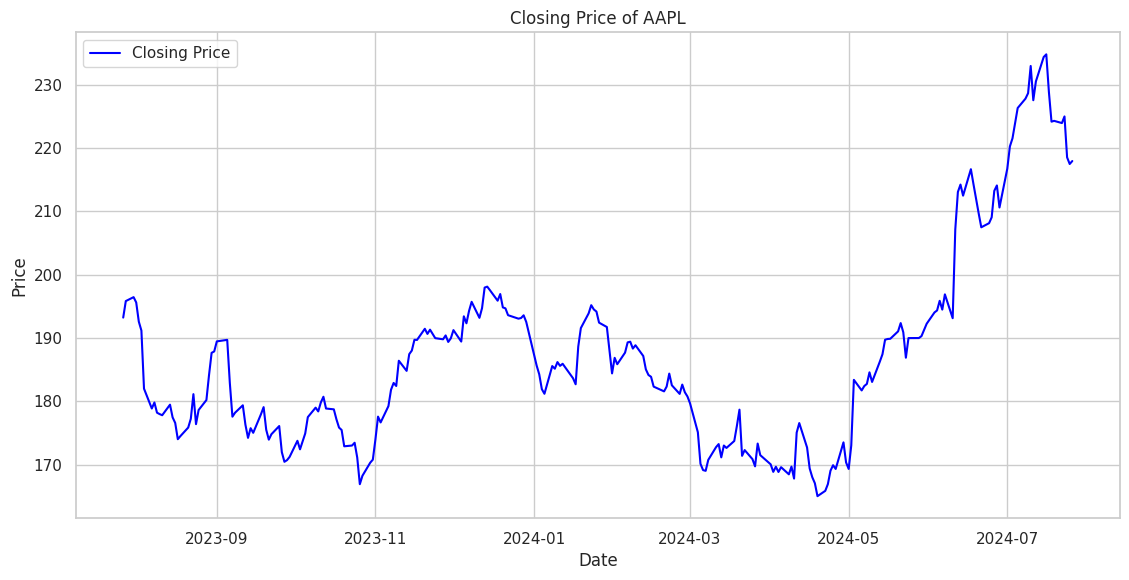

In [48]:
# Plot the Closing Price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.title('Closing Price of ' + ticker)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


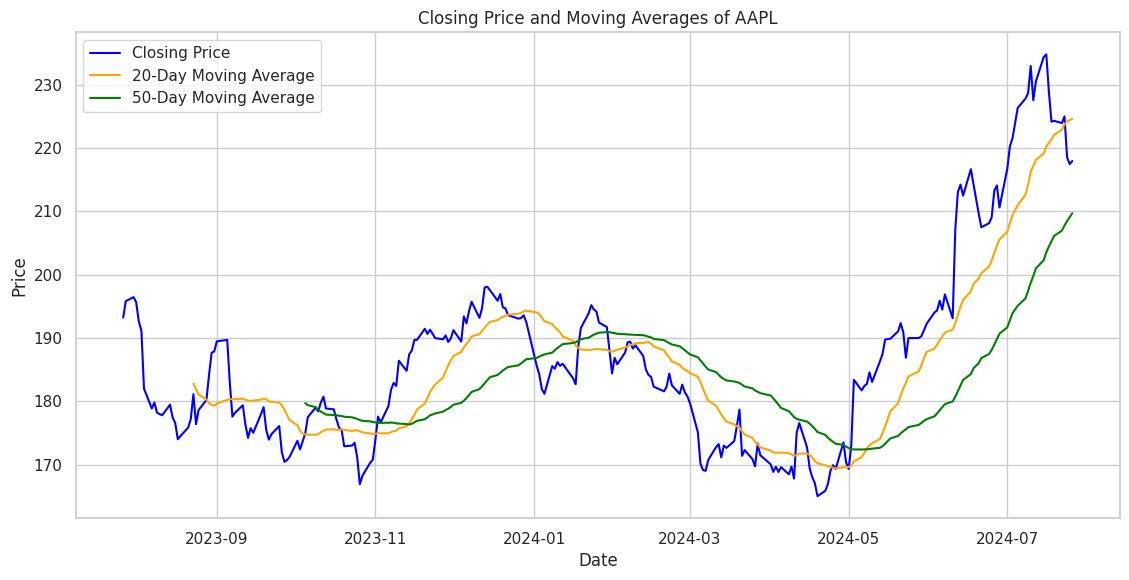

In [49]:
# Calculate and Plot Moving Averages
short_window = 20  # 20-day moving average
long_window = 50   # 50-day moving average

data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['Short_MA'], label='20-Day Moving Average', color='orange')
plt.plot(data['Long_MA'], label='50-Day Moving Average', color='green')
plt.title('Closing Price and Moving Averages of ' + ticker)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


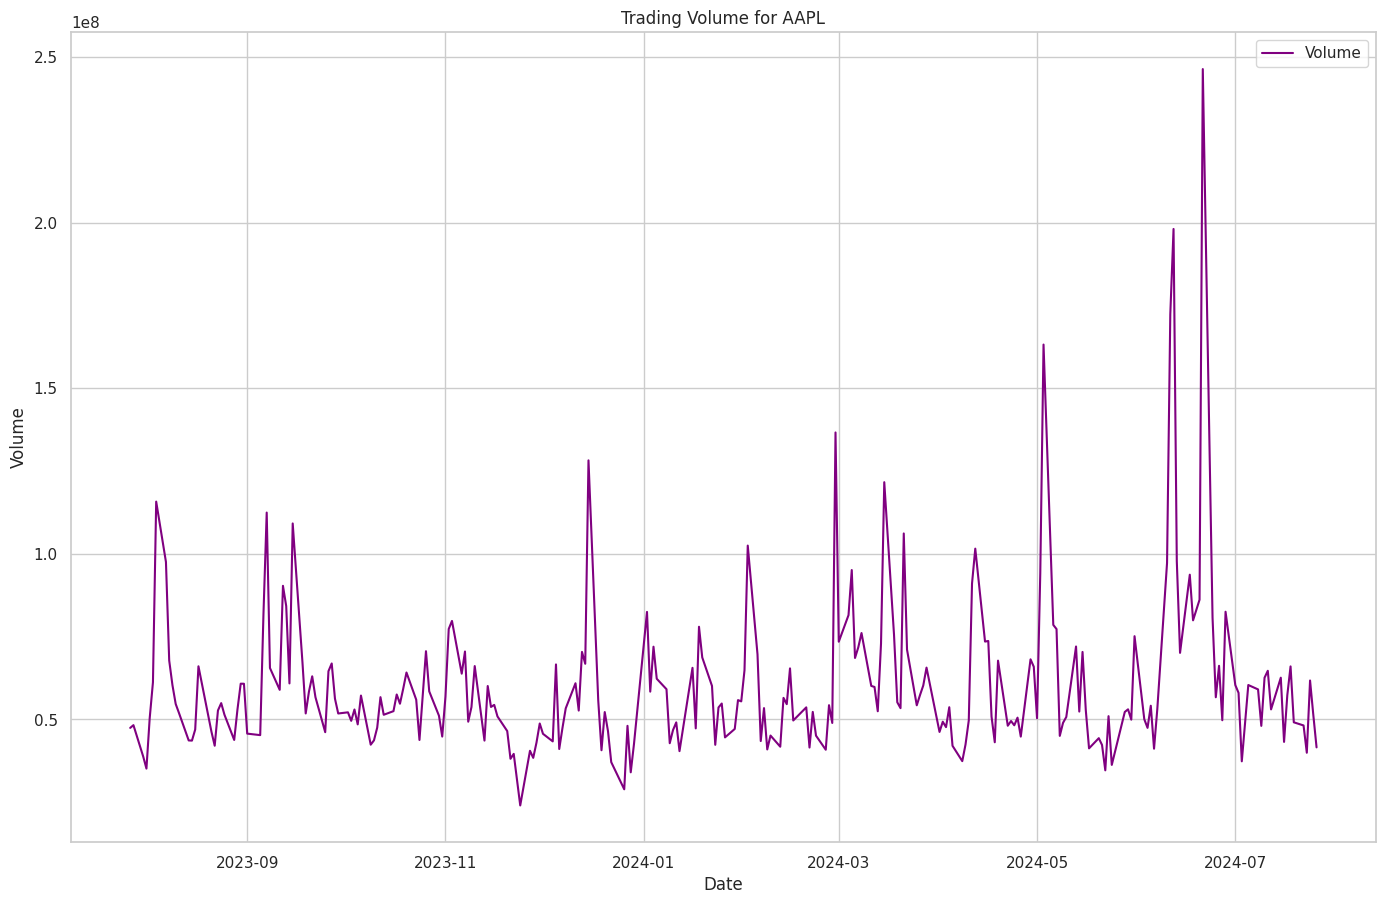

In [50]:
# Step 7: Analyze Volume
plt.figure(figsize=(15, 10))
plt.plot(data['Volume'], label='Volume', color='purple')
plt.title(f"Trading Volume for {ticker}")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


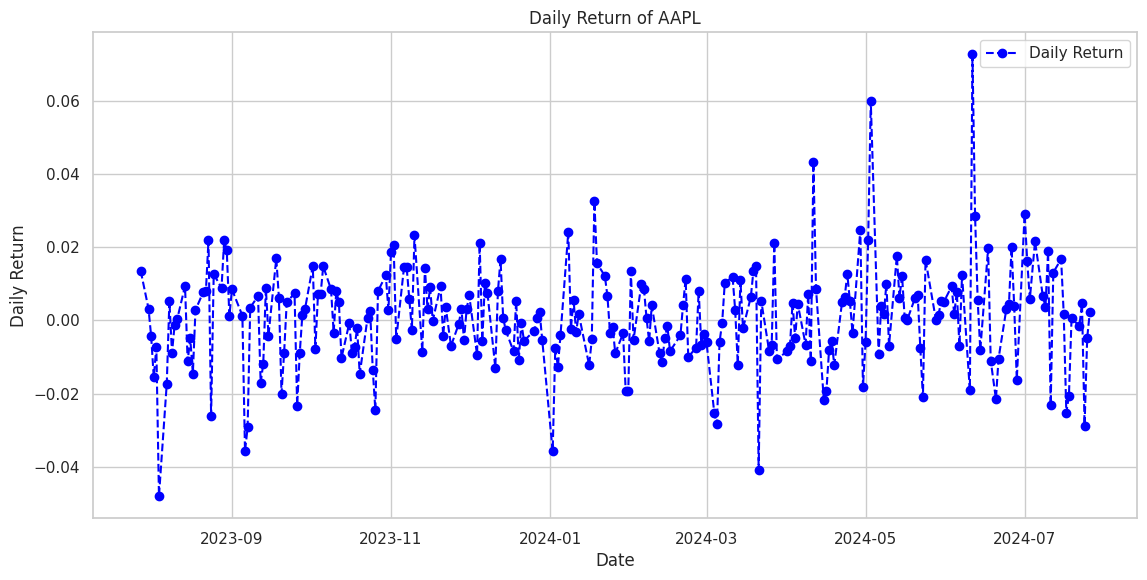

In [51]:
# Calculate Daily Returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Plot Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(data['Daily Return'], linestyle='--', marker='o', color='blue', label='Daily Return')
plt.title(f'Daily Return of {ticker}')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

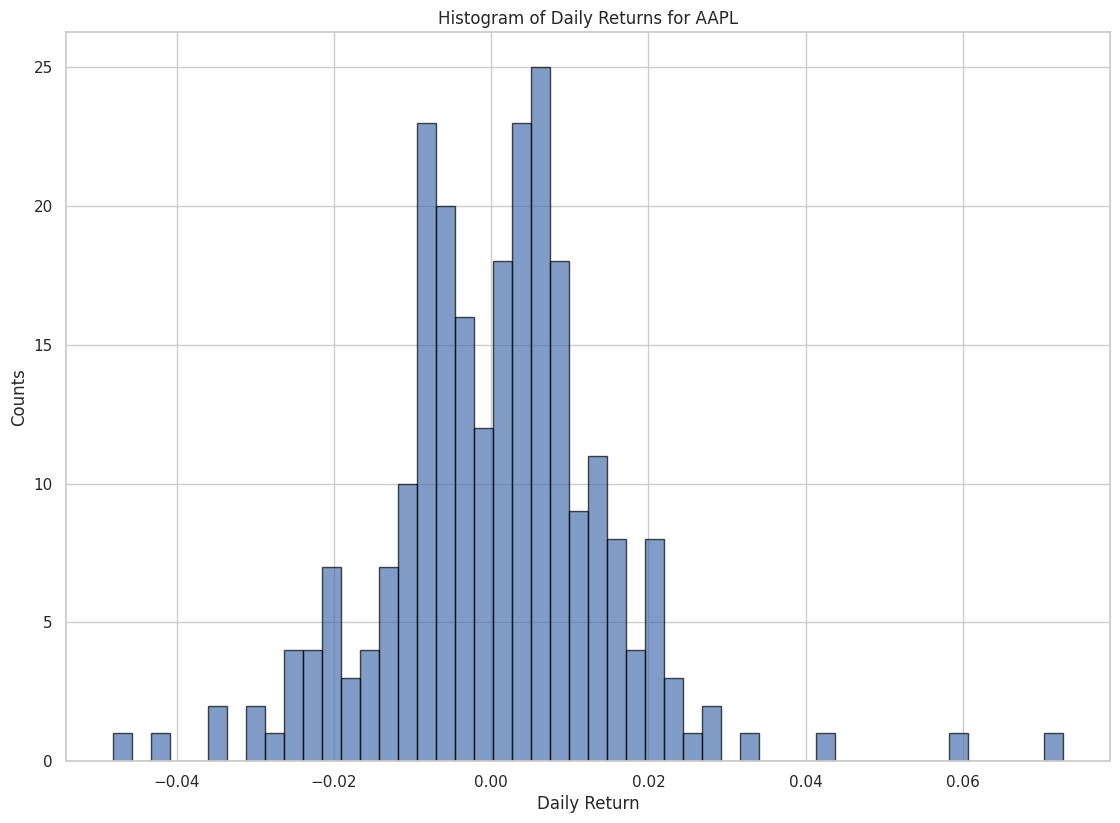

In [38]:
plt.figure(figsize=(12, 9))
plt.hist(data['Daily Return'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'Histogram of Daily Returns for {ticker}')
plt.grid(True)
plt.show()

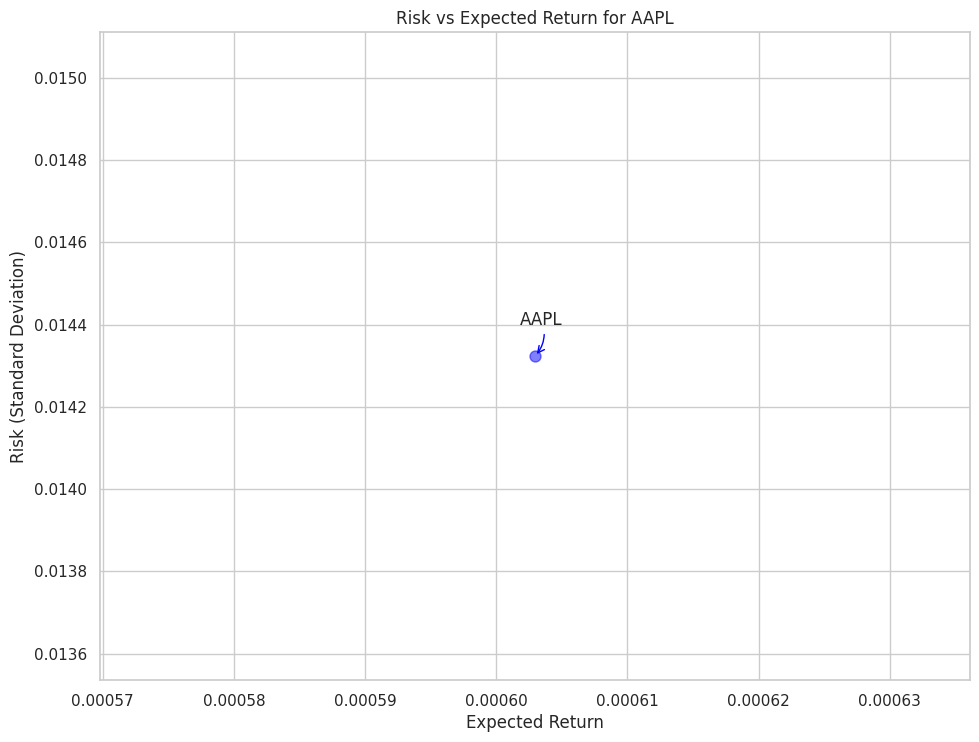

In [52]:
# Calculate expected return (mean) and risk (standard deviation)
expected_return = data['Daily Return'].mean()
risk = data['Daily Return'].std()

# Visualizing Risk vs Expected Return
plt.figure(figsize=(10, 8))

# Scatter plot of risk vs expected return
area = np.pi * 20  # Area of the markers in the scatter plot
plt.scatter(expected_return, risk, s=area, color='blue', alpha=0.5)

plt.xlabel('Expected Return')
plt.ylabel('Risk (Standard Deviation)')
plt.title(f'Risk vs Expected Return for {ticker}')

# Annotate the point
plt.annotate(f'{ticker}', xy=(expected_return, risk), xytext=(20, 20),
             textcoords='offset points', ha='right', va='bottom',
             arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.grid(True)
plt.show()
#Return: On average, the stock provides a 0.06% daily return.
#Risk: The stock’s daily returns vary by about ±1.43% from this average.